# CUSTOMER CHURN PROJECT 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
# Load Customer Churn Dataset
df_churn = pd.read_csv("C:\\Users\\HP\\Desktop\\-\\Data Analysis Projects\\Customer Churn\\customer_churn.csv")

In [4]:
# Exploratory Data Analysis for Churn Dataset
print(df_churn.info())
print(df_churn.describe())
print(df_churn.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Tenure           1000 non-null   int64  
 2   MonthlyCharges   1000 non-null   float64
 3   Contract         1000 non-null   object 
 4   PaymentMethod    1000 non-null   object 
 5   StreamingTV      1000 non-null   object 
 6   StreamingMovies  1000 non-null   object 
 7   TechSupport      1000 non-null   object 
 8   Churn            1000 non-null   int64  
 9   TotalCharges     1000 non-null   float64
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB
None
        CustomerID       Tenure  MonthlyCharges        Churn  TotalCharges
count  1000.000000  1000.000000     1000.000000  1000.000000   1000.000000
mean    500.500000    35.489000       70.515320     0.511000   2510.031200
std     288.819436    20.709485       29.311928  

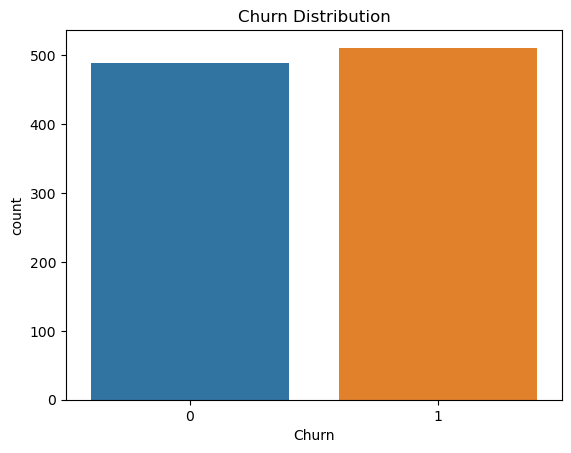

In [5]:
# Churn Distribution Visualization
sns.countplot(x="Churn", data=df_churn)
plt.title("Churn Distribution")
plt.show()

In [6]:

# Data Preprocessing for Churn Dataset
df_churn = df_churn.dropna()
df_churn = pd.get_dummies(df_churn, drop_first=True)

In [7]:
# Splitting Data
X = df_churn.drop("Churn", axis=1)
y = df_churn["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Train Random Forest Model
model_churn = RandomForestClassifier(n_estimators=100, random_state=42)
model_churn.fit(X_train, y_train)
y_pred = model_churn.predict(X_test)

Accuracy: 0.52
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.56      0.54       100
           1       0.52      0.48      0.50       100

    accuracy                           0.52       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.52      0.52      0.52       200



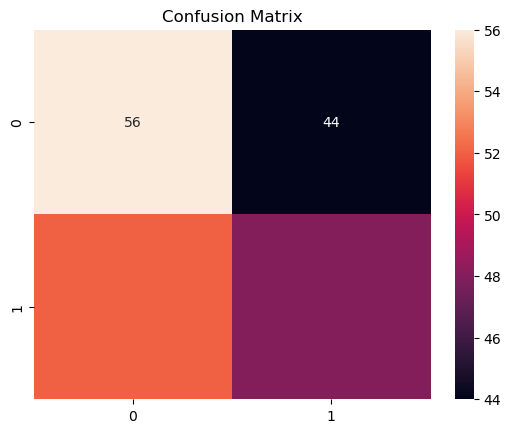

In [23]:
# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [24]:
# Save Churn Model
joblib.dump(model_churn, "C:/Users/HP/Desktop/-/Data Analysis Projects/churn_prediction_model.pkl")

['C:/Users/HP/Desktop/-/Data Analysis Projects/churn_prediction_model.pkl']

In [25]:
# Store Processed Data in SQL Database
conn = sqlite3.connect("churn_analysis.db")
df_churn.to_sql("churn_data", conn, if_exists="replace", index=False)
print("Customer churn data stored in database successfully!")


Customer churn data stored in database successfully!


In [26]:
# Load Sales Forecasting Dataset
df_sales = pd.read_csv("C:\\Users\\HP\Desktop\\-\\Data Analysis Projects\\Customer Churn\\sales_data.csv", parse_dates=["Date"], index_col="Date")
df_sales = df_sales.asfreq("D")

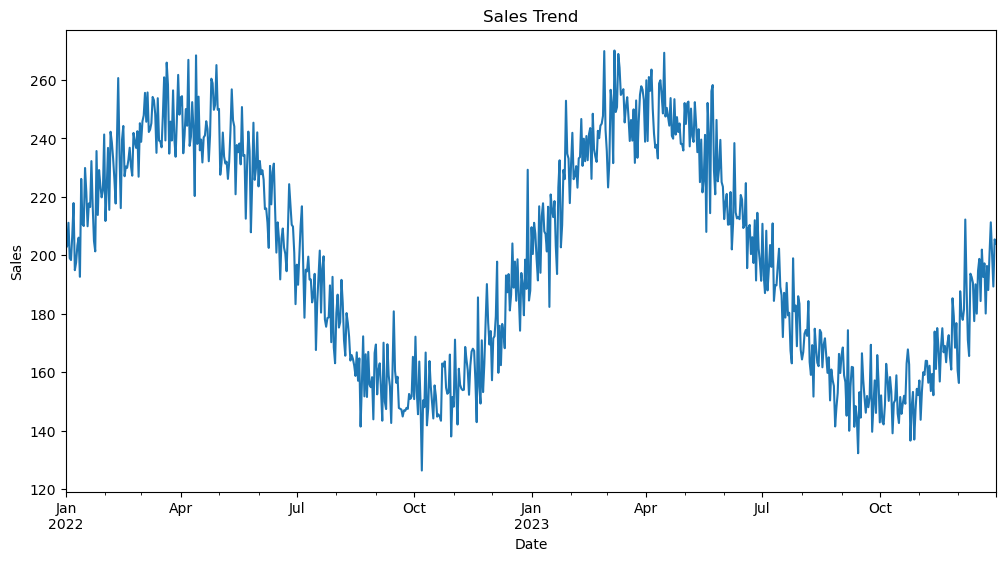

In [27]:
# Sales Trend Visualization
df_sales["Sales"].plot(figsize=(12, 6), title="Sales Trend", xlabel="Date", ylabel="Sales")
plt.show()

In [28]:
# Train-Test Split
train_size = int(len(df_sales) * 0.8)
train, test = df_sales.iloc[:train_size], df_sales.iloc[train_size:]

In [29]:
# Apply Exponential Smoothing Model
model_sales = ExponentialSmoothing(train["Sales"], trend="add", seasonal="add", seasonal_periods=12)
fit_model = model_sales.fit()

In [31]:
# Forecast Future Sales
test.loc[:, "Forecast"] = fit_model.forecast(len(test))

In [32]:
# Model Evaluation
mae = mean_absolute_error(test["Sales"], test["Forecast"])
mse = mean_squared_error(test["Sales"], test["Forecast"])
rmse = np.sqrt(mse)
print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")


MAE: 54.31332639420914, MSE: 4959.659105230286, RMSE: 70.42484721481677


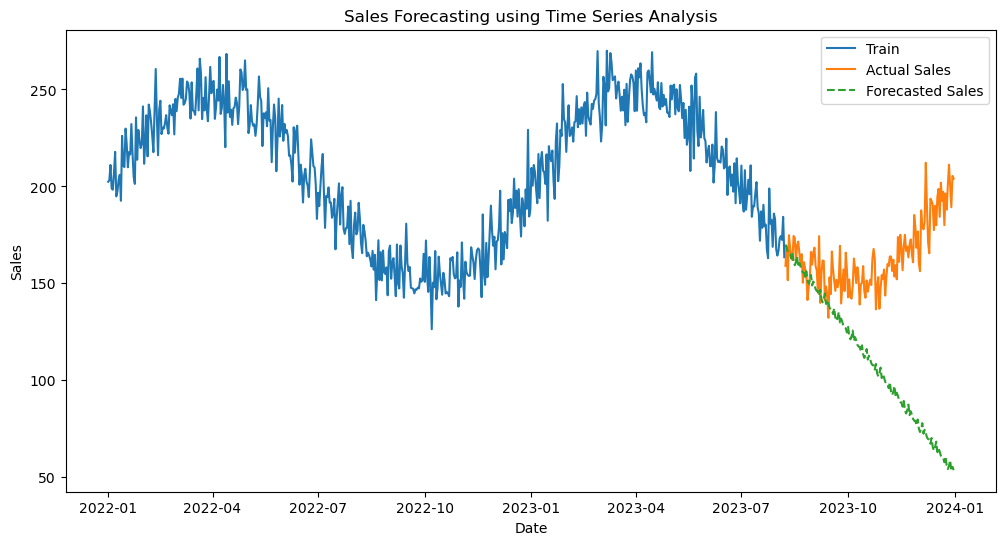

In [33]:
# Plot Actual vs Forecasted Sales
plt.figure(figsize=(12, 6))
plt.plot(train.index, train["Sales"], label="Train")
plt.plot(test.index, test["Sales"], label="Actual Sales")
plt.plot(test.index, test["Forecast"], label="Forecasted Sales", linestyle="dashed")
plt.legend()
plt.title("Sales Forecasting using Time Series Analysis")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

In [34]:
# Save Forecast Results
test.to_csv("C:/Users/HP/Desktop/-/Data Analysis Projects/sales_forecast_results.csv")
print("Forecast results saved successfully!")

Forecast results saved successfully!
